# Выпускной проект
# Банки - Анализ оттока клиентов

***Заказчик: Банк «Метанпром»***

***Ссылка на презентацию:*** https://drive.google.com/file/d/1bl_msuLhcimZEolY-N93CnSuNH2nrP0T/view?usp=drive_link

***Задача:***
- Проанализировать клиентов регионального банка и выделить сегменты клиентов,
  которые склонны уходить из банка.
- Провести исследовательский анализ данных, определить все значимые
  признаки отточности (интервалы значений характеристик, которые связаны с
  повышенным оттоком, сравнить портреты типичных клиентов, которые
  склонны и не склонны уходить из банка и т.д)
- Сформулировать и проверить статистические гипотезы:
  - Проверить гипотезу различия дохода между теми клиентами, которые
    ушли и теми, которые остались.
  - Сформулировать и проверить статистическую гипотезу относительно
    представленных данных, которая поможет внести ясность в исследование
- Объединяя признаки отточности, сформировать сегменты, отобрать из них
  лучшие и дать по ним рекомендации.

***Входные данные:***

Датасет содержит данные о клиентах банка «Метанпром». 

Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.

**План проекта:**

1.  ***Загрузка и обзор имеющихся данных, подготовка данных к дальнейшему исследованию.***


2.  ***Предобработка данных:***

 2.1  Привести названия столбцов к единому формату,
 
 2.2  Оценить типы данных и при необходимости заменить их,
 
 2.3  Оценить наличие,количество дубликатов (явных и неявных, в определенных столбцах), обработать их,
 
 2.4  Найти пропуски данных, проанализировать их, обработать,
 
 2.5  Найти аномалии данных, обработать их,
 
 2.6  Провести кодирование данных (преобразовать категориальные данные в числовые, делая их пригодными для анализа)
 
 2.6  Оценить оставшийся объем данных после обработки и удаления (убедиться, что осталось 95%)


3.  ***Исследовательский анализ данных:***

 3.1  Посмотреть распределения клиентов по полу, возрасту, месту жительства клиента, его доходу,баланс денежных средств на счете, активности, количеству продуктов, которыми пользуется вкладчик, баллам кредитного скоринга (в том числе в разрезе оттока)
 
 3.2  Оценить влияние определенных признаков на отток клиентов
 
 3.3  Провести корреляционный анализ
     
 3.4  На основании полученных данных составить портрет типичного клиента, который склонен к оттоку или нет
 
 
4.  ***Сформулировать и проверить статистические гипотезы:***

 4.1  Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
 
 4.2  Проверить гипотезу различия кредитного скоринга между теми клиентами, которые ушли и теми, которые остались.
 
 
5.  ***Cформулировать промежуточные выводы***
(какие признаки стратегическим образом влияют на отток клиентов)


6.  ***Cформировать сегменты на основе стратегических показателей отобрать из них значимые .***


7.  ***Выводы и рекомендации для заказчика по конкретным сегментам.***


8.  ***Подготовка презентации.***

## Загрузка и обзор имеющихся данных, подготовка данных к дальнейшему исследованию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st
from scipy.stats import ttest_ind
import warnings; warnings.filterwarnings(action = 'ignore')

In [2]:
# игнорируем предупреждения
pd.set_option('chained_assignment', 'warn')
warnings.simplefilter(action='ignore', category=FutureWarning)





In [3]:
# чтение файлов с данными и сохранение в переменную data
data = pd.read_csv('/datasets/bank.csv')
    

In [4]:
data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
data.shape

(10000, 12)

In [7]:
# введем переменную num_0, которую используем по завершению предобработки для оценки оставшегося объема данных
num_0 = data.shape[0]
num_0

10000

In [8]:
data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


В нашем распоряжении датафрейм, содержащий 10000 строк и 12 столбцов. 

Названия столбцов не приведены к единому формату, имеются пропуски в данных (столбцы age и balance), аномальные значения (0 в столце products). Среднее и медианное значение в столбцах balance и est_salary сильно отличаются, что говорит о наличии аномальных значений. Типы данных в столбцах credit_card, last_activity, churn содержат значения 0 и 1, значит должны иметь тип bool. 

## Предобработка данных:

### Приведем названия столбцов к единому формату


In [9]:
data = data.rename(columns = {'USERID':'user_id', 'EST_SALARY': 'est_salary'})
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Оценим типы данных и при необходимости заменим их

In [10]:
data['credit_card'] = data['credit_card'].astype('bool')
data['last_activity'] = data['last_activity'].astype('bool')
data['churn'] = data['churn'].astype('bool')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  bool   
 9   last_activity  10000 non-null  bool   
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  bool   
dtypes: bool(3), float64(4), int64(3), object(2)
memory usage: 732.5+ KB


Типы данных соответствуют ожидаемым.

### Оценим наличие,количество дубликатов (явных и неявных, в определенных столбцах), обработаем их

In [11]:
data.duplicated().sum()

0

Полные дубликаты строк в датафрейме отсутствуют. Проверим их наличие с столбце user_id.

In [12]:
data['user_id'].duplicated().sum()

73

Обнаружилось 73 дубликата. Посмотрим на строки датафрейма с ними, чтобы понять причины их возникновения.

In [13]:
duplicates = data[data['user_id'].duplicated(keep=False)].sort_values(by='user_id')
duplicates

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,False,True,175920.48,True
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,False,True,119247.61,False
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,True,False,137718.93,False
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,True,True,107792.71,True
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,True,True,146427.96,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,False,False,934412.61,True
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,True,False,102036.14,True
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,True,False,103314.92,False
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,False,True,85195.80,False


Вероятнее всего, при переезде клиента из одного города в другой (или обращении в филиал банка в другом городе) данные дублировались. Удалим строки с дубликатами.

In [14]:
data = data.drop_duplicates(subset='user_id', keep = 'first').reset_index(drop= True)

In [15]:
data['city'].value_counts()

Ярославль    5856
Рыбинск      2654
Ростов       1417
Name: city, dtype: int64

Названий городов в нашем датафрейме 3, возможные неявные дубликаты отсутствуют.

### Найдем пропуски данных, проанализируем их и обработаем

In [16]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 4
equity              0
balance          2260
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [17]:
data.isna().mean()

user_id          0.000000
score            0.000000
city             0.000000
gender           0.000000
age              0.000403
equity           0.000000
balance          0.227662
products         0.000000
credit_card      0.000000
last_activity    0.000000
est_salary       0.000000
churn            0.000000
dtype: float64

Пропуски присутствуют в столбце age, количество их меньше 0,01%. Удалим эти строки.

In [18]:
data = data.dropna(subset=['age'])

И заменим тип данных на int для удобства дальнейшего анализа

In [19]:
data['age'] = data['age'].astype(int)

Пропуски в столбце balance составляют почти 23%, это слишком значительное количество, чтобы просто удалить их. Заменять пропуски каким-то значением считаю нецелесообразным, так мы исказим конечную статистику.

Попробуем разобраться в причинах возникновения этих пропусков.

In [20]:
# выведем первые строки таблицы с клиентами, у которых не заполнено значение balance.

data_no_balances = data[data['balance'].isnull()]
data_no_balances.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False
9,133130,906.0,Ярославль,Ж,67,0,NaN,1,False,True,238055.53,False
10,148929,927.0,Ростов,М,52,0,NaN,1,True,True,196820.07,False
11,172184,921.0,Ростов,М,41,0,NaN,1,True,True,217469.48,False
19,127034,922.0,Рыбинск,Ж,53,0,NaN,1,False,False,147094.82,False


In [21]:
# выведем первые строки таблицы с клиентами, у которых заполнено значение balance.

data_balance = data[data['balance'].notnull()]
data_balance.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,False,True,75719.14,True
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,True,False,86621.77,False
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,False,True,174423.53,True
4,157978,730.0,Ярославль,М,34,5,174.00,1,True,False,67353.16,True
5,202305,856.0,Рыбинск,М,56,4,863687.24,3,True,False,156619.80,False


Посмотрим, есть ли отличия в городах проживания клиентов. Возможно, есть какой-то город-аутсайдер по формированию пропусков.

In [22]:
data_no_balances['city'].value_counts()

Ярославль    1449
Рыбинск       576
Ростов        235
Name: city, dtype: int64

Посчитаем процент клиентов "без баланса" в каждом городе

In [23]:
# 1. Количество клиентов с пропусками в балансе по каждому городу
missing_balance_counts = data_no_balances['city'].value_counts()

# 2. Общее количество клиентов в каждом городе
total_clients_by_city = data['city'].value_counts()

# 3. Вычисление процента клиентов с пропусками в балансе
percentage_missing_balance = (missing_balance_counts / total_clients_by_city) * 100

# Вывод результата
percentage_missing_balance.round(2)


Ярославль    24.75
Рыбинск      21.71
Ростов       16.60
Name: city, dtype: float64

Чаще пропуски наблюдаются у клиентов из Ярославля и Рыбинска. Но немало их и в Ростове.

Попробуем найти другие причины пропусков в столбце balance.

In [24]:
data_no_balances.describe()

,user_id,score,age,equity,balance,products,est_salary
count,2260.000000,2260.000000,2260.000000,2260.000000,0.0,2260.000000,2.260000e+03
mean,171975.568584,865.334956,42.125664,0.051770,NaN,1.161504,2.267006e+05
std,33277.188448,89.669447,11.953138,0.227525,NaN,0.401442,1.999817e+05
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,2.027403e+04
25%,143067.000000,871.000000,33.000000,0.000000,NaN,1.000000,1.204570e+05
50%,172498.500000,903.000000,40.000000,0.000000,NaN,1.000000,1.747554e+05
75%,201354.250000,922.000000,49.000000,0.000000,NaN,1.000000,2.404518e+05
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.333687e+06


In [25]:
data_balance.describe()

,user_id,score,age,equity,balance,products,est_salary
count,7663.000000,7663.000000,7663.000000,7663.000000,7.663000e+03,7663.000000,7.663000e+03
mean,171659.494062,843.835835,42.907216,3.395928,8.282482e+05,2.080908,1.246424e+05
std,33818.241547,55.343192,12.237337,1.584509,1.984248e+06,0.757959,1.048211e+05
min,94561.000000,689.000000,18.000000,0.000000,0.000000e+00,1.000000,2.546300e+03
25%,142562.000000,801.000000,33.000000,2.000000,2.954990e+05,2.000000,6.758873e+04
50%,172667.000000,841.000000,40.000000,4.000000,5.249612e+05,2.000000,1.063552e+05
75%,201019.000000,882.000000,52.000000,5.000000,9.808015e+05,2.000000,1.553635e+05
max,229136.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.395064e+06


Обращает на себя внимание, что среди клиентов, у которых отсутствует баланс, встречаются "аномальные" по значению столбца products (встречается значение 0, но клиентом банка заведомо может являться человек, который пользуется хотя бы одним банковским продуктом). Также клиенты "без баланса" имеют меньшее количество баллов собственности (максимум 3, а больше 75% пользователей не имеют ее совсем - 0 баллов). Однако окончательно сделать вывод о причинах такого количества пропусков сложно.

Тем не менее, учитывая, что пропуски в столбце balance составляют почти 23%, оставим их без изменения.

### Найдем аномалии данных, обработаем их


In [26]:
data.describe()

,user_id,score,age,equity,balance,products,est_salary
count,9923.000000,9923.000000,9923.000000,9923.000000,7.663000e+03,9923.000000,9.923000e+03
mean,171731.481205,848.732339,42.729215,2.634284,8.282482e+05,1.871511,1.478865e+05
std,33694.370969,65.400112,12.177008,1.979328,1.984248e+06,0.793110,1.393639e+05
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,2.546300e+03
25%,142720.000000,802.000000,33.000000,0.000000,2.954990e+05,1.000000,7.525212e+04
50%,172635.000000,853.000000,40.000000,3.000000,5.249612e+05,2.000000,1.197193e+05
75%,201157.500000,900.000000,51.000000,4.000000,9.808015e+05,2.000000,1.746733e+05
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.395064e+06


Найдем "аномальных клиентов банка", которые не пользуются ни одним банковским продуктом.

In [27]:
data_anom = data[data['products']==0]
data_anom

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8905,147837,962.0,Рыбинск,Ж,79,3,NaN,0,False,False,25063.96,True


Удалим этого пользователя

In [28]:
data = data[data['products'] != 0]

Рассмотрим распределение ***оценочного дохода*** клиентов банка.

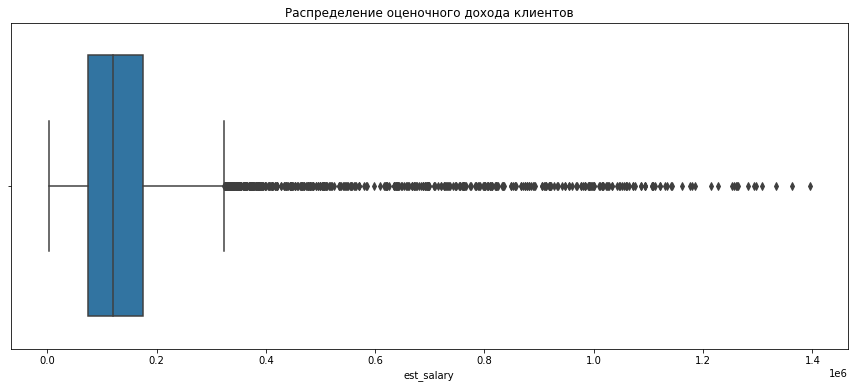

In [29]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='est_salary')
plt.title("Распределение оценочного дохода клиентов")
plt.show()

Обращает на себя внимание наличие аномально высоких значений.

In [30]:
percentiles = np.percentile(data['est_salary'], [90,95, 98])
percentiles


array([242358.289 , 316862.9855, 665401.6992])

Всего 2% клиентов банка имеют оценочный доход свыше 665 тыс. рублей. Удалим эти аномальные значения.

In [31]:
data = data[data['est_salary'] <= np.percentile(data['est_salary'], 98)]


Считать ли аномальным минимальный размер est_salary в 2546 рублей, ответить сложно,т.к. неизвестен период, за который предоставлен отчет (и соответственно, размер МРОТ на тот момент).

Рассмотрим распределение ***баланса*** клиентов банка на наличие аномальных значений.

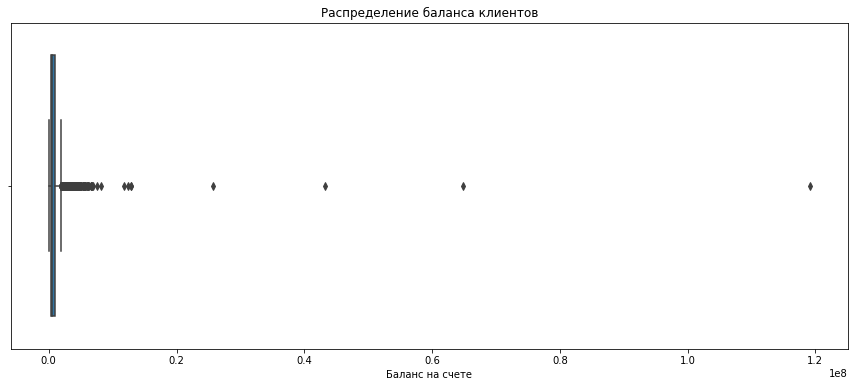

In [32]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='balance')
plt.title("Распределение баланса клиентов")
plt.xlabel("Баланс на счете")
plt.show()

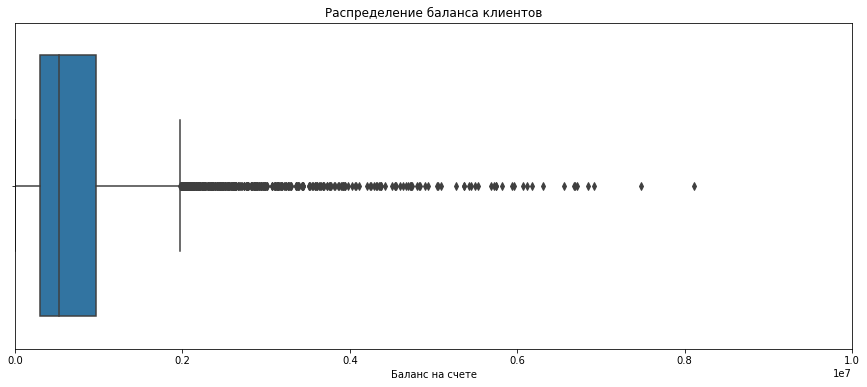

In [33]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='balance')
plt.title("Распределение баланса клиентов")
plt.xlabel("Баланс на счете")
plt.xlim(0, 10000000)
plt.show()

Обращает на себя внимание наличие аномально высоких значений.



In [34]:
percentiles = np.percentile(data['balance'].dropna(), [90,95, 98])
percentiles

array([1430334.946 , 1989603.104 , 2985778.1124])

Меньше 2% клиентов имеют баланс больше 3 млн. рублей. Удалим эти аномалии (не удаляя пропуски).

In [35]:
data = data[(data['balance'] <= 3000000) | (data['balance'].isna())]


В остальных столбцах аномалии не выявлены.

### Провести кодирование данных (преобразовать категориальные данные в числовые, делая их пригодными для анализа)


Для того, чтобы применять среднее и смотреть корреляции какого-то числового показателя с категориальным неупорядоченным, проведем кодирование данных. Учтем, что исходные столбцы нам надо сохранить.

In [36]:
# Копируем нужные столбцы, которые хотим закодировать
data_copy = data[['gender', 'city']].copy()
# Применяем pd.get_dummies только к этим столбцам
data_dummies = pd.get_dummies(data_copy, columns=['gender', 'city'])

# Объединяем оригинальный DataFrame и закодированные столбцы
data = pd.concat([data, data_dummies], axis=1)

data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,False,True,75719.14,True,1,0,0,1,0
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,True,False,86621.77,False,1,0,0,1,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False,1,0,0,1,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,False,True,174423.53,True,1,0,0,0,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,True,False,67353.16,True,0,1,0,0,1


### Оценить оставшийся объем данных после обработки и удаления (убедиться, что осталось более 95%)

In [37]:
num_1 = data.shape[0]
num_1/num_0*100

95.72

Объем оставшихся данных достаточен для дальнейшего анализа.

 ***Выводы***

- Окончательная таблица содержит информацию о 9572 клиентах банка.Клиентские данные обезличены.
- Банк представлен в городах Ярославль, Рыбинск и Ростов. 
- Клиенты банка могут использовать от одного до пяти продуктов. 
- Возраст клиентов от 18 до 86 лет,  средний возраст 42 года, медианный - 40 лет. .
- Клиент может как не иметь недвижимость в собственности, так и владеть 9 объектами
- В таблице нет явных дубликатов, но выявлены дубликаты в столбце user_id (появившиеся, вероятно, при обращении клиента в филиалы банка в разных городах). Дубликаты удалены.
- Заменены типы данных в столбцах churn, last_activity, credit_card.
- Выявлены пропуски в столбце balance у клиентов из всех городов. Пока сложно сказать, чем они вызваны - возможно это связано с локальными особенностями одного из продуктов. Учитывая большое количество пропусков (23%), они оставлены без изменений.
- Удалены аномальные значения в столбцах products, est_salary и balance.
- Категориальные данные в столбцах gender и city преобразованы в числовые (пригодные для дальнейшего анализа).
- Объем оставшихся после предобработки данных составляет 95,72%, что достаточно для дальнейшего анализа.



## Исследовательский анализ данных

### Посмотрим распределения клиентов по полу, возрасту, месту жительства клиента, его доходу,балансу денежных средств на счете, активности, количеству продуктов, которыми пользуется вкладчик, баллам кредитного скоринга (в том числе в разрезе оттока)

#### Посмотрим на средние значения признаков в двух группах — тех, кто ушел  (churn = 1) и тех, кто остался (0).

In [38]:
data.groupby('churn').agg('mean').T

churn,False,True
user_id,171950.617089,170391.565445
score,844.152044,859.529378
age,42.975805,41.295521
equity,2.392843,3.727167
balance,604884.641118,877166.407359
products,1.760856,2.361257
credit_card,0.708519,0.560791
last_activity,0.482873,0.700407
est_salary,129472.621354,131419.391210
gender_Ж,0.534955,0.357766


- средний возраст клиента  средний балл кредитного скоринга и оценочный уровень доходов примерно одинаков в обеих группах,
- отточные клиенты в среднем владеют большим количеством объектов недвижимости,
- средний баланс на счете у отточных клиентов почти в два раза выше, чем у остающихся,
- разница в количестве используемых банковских продуктов незначительна,
- отточные клиенты в среднем более активны, чем остающиеся.

#### Посмотрим общий портрет клиентов банка

##### Распределение по категориальным признакам.

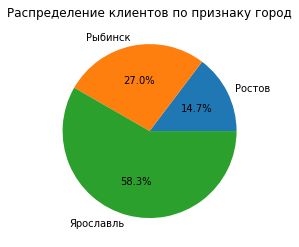

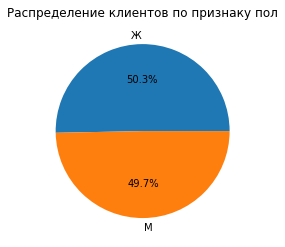

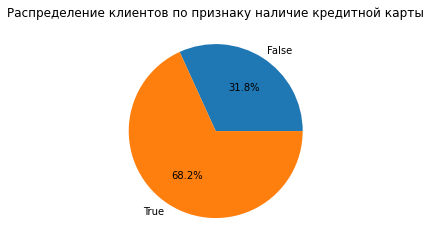

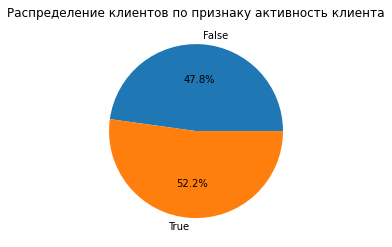

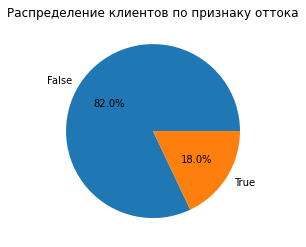

In [39]:
column_names = {
    'city': 'город',
    'gender': 'пол',
    'credit_card': 'наличие кредитной карты',
    'last_activity': 'активность клиента',
    'churn': 'оттока'
}

for column in ['city','gender','credit_card','last_activity','churn']:
    df = data.groupby(column).agg({'user_id': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(df['user_id'], labels=df.index, autopct='%1.1f%%')
    ax1.set_title(f'Распределение клиентов по признаку {column_names[column]}')
    plt.show()

##### Распределение по числовым признакам.

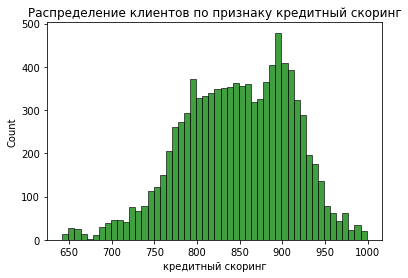

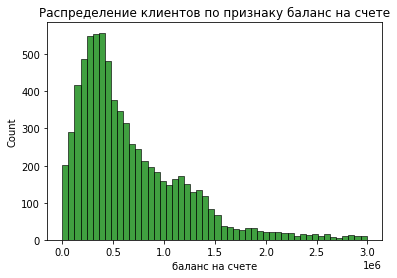

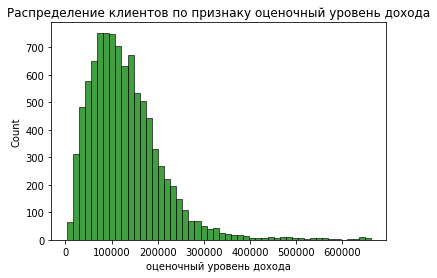

In [40]:
column_names = {
    'score': 'кредитный скоринг',
    'balance': 'баланс на счете',
    'est_salary': 'оценочный уровень дохода'
}

for column in ['score','balance','est_salary']:
    sns.histplot(data[column], bins=50, color = 'green')
    plt.title(f'Распределение клиентов по признаку {column_names[column]}')
    plt.xlabel(column_names[column])
    plt.show()

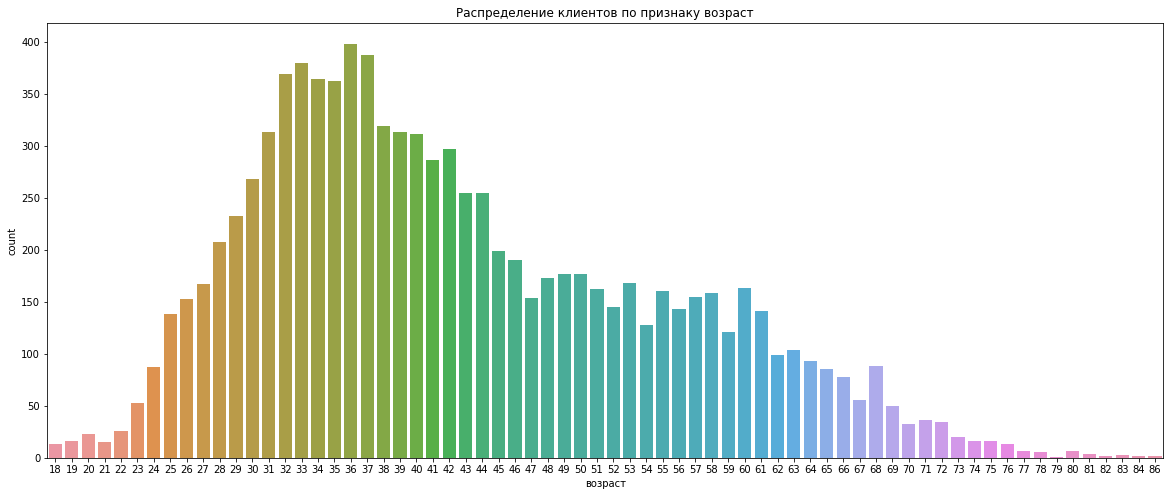

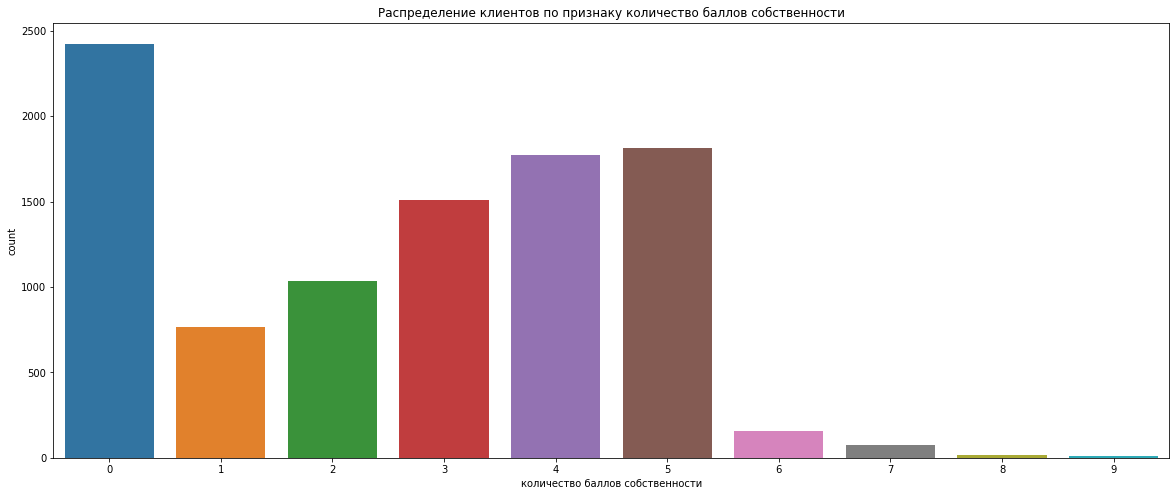

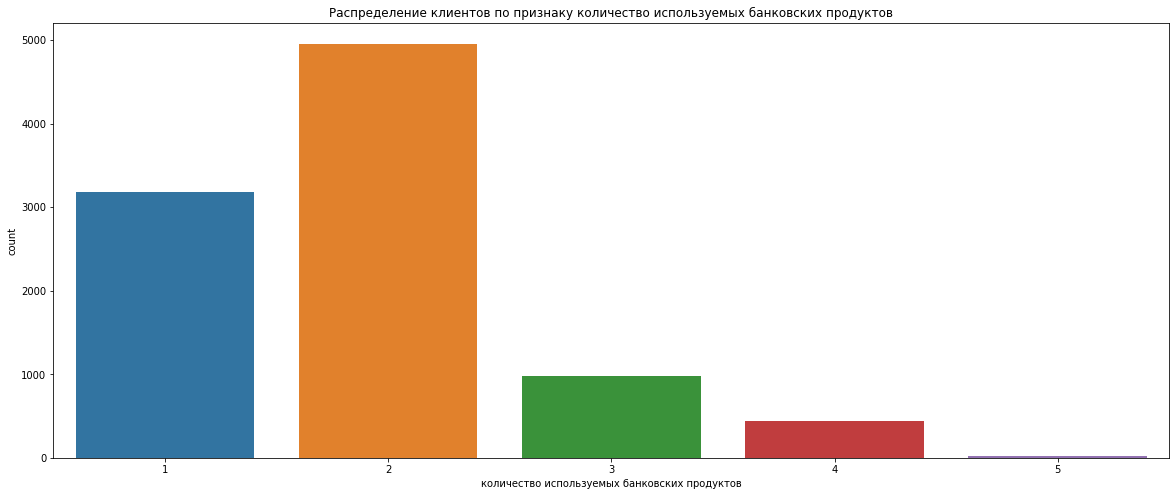

In [41]:
column_names = {
    'age': 'возраст',
    'equity': 'количество баллов собственности',
    'products': 'количество используемых банковских продуктов'
}

for column in ['age','equity', 'products']:
    plt.figure(figsize=(20,8))
    sns.countplot(data[column])
    plt.title(f'Распределение клиентов по признаку {column_names[column]}')
    plt.xlabel(column_names[column])
    
    plt.show()

***Выводы:***
- Больше половины всех клиентов банка проживают в Ярославле, 27% в Рыбинске, меньшая часть - в Ростове.
- Женщин и мужчин среди клиентов банка примерно поровну.
- Кредитная карта есть у 68% пользователей.
- Активными считаются 52% клиентов банка.
- Отток клиентов из банка составляет 18%.
- Большинство клиентов имеют кредитный рейтинг от 800 до 900.
- Баланс на счете у большинства клиентов от 0 до 1 млн. рублей.
- Пиковые значения оценочного дохода клиентов находятся в районе 100 тыс.рублей.
- Большинство клиентов банка в возрасте 30-40 лет, пиковые значения - 36-37 лет.
- Большая часть клиентов не имеет объектов в собственности, либо имеет 3-5.
- Большая часть клиентов пользуется 1 или 2 продуктами банка.

### Оценим влияние определенных признаков на отток клиентов

#### Построим гистограммы распределения признаков и диаграммы размаха для числовых признаков в разрезе оттока.

In [42]:
# функция по построению гистограммы распределения и диаграммы размаха для числовых признаков в разрезе оттока клиентов;
# на входе функции передем параметры: датафрейм, название столбца, по которому строим график, название графика;

def numeric_plots_churn(data, col, title):
    fig, ax = plt.subplots(figsize = (15, 5))
    
    sns.histplot(data[data['churn']==0][col], label='остающиеся',color = '#EFC87B', ax = plt.subplot(1, 2, 1))
    sns.histplot(data[data['churn']==1][col], label = 'отток', color = '#184562', ax = plt.subplot(1, 2, 1), alpha=.4)
    plt.xlabel('')
    plt.ylabel('количество пользователей')
    plt.legend()
    
    sns.boxplot(y = col, x = 'churn', data = data, ax = plt.subplot(1, 2, 2), palette='Pastel2_r') 
    plt.xlabel('')
    plt.ylabel('')
    
    plt.xticks(np.arange(2), ('Действующие клиенты', 'Отток'))
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()

##### Баллы кредитного скоринга

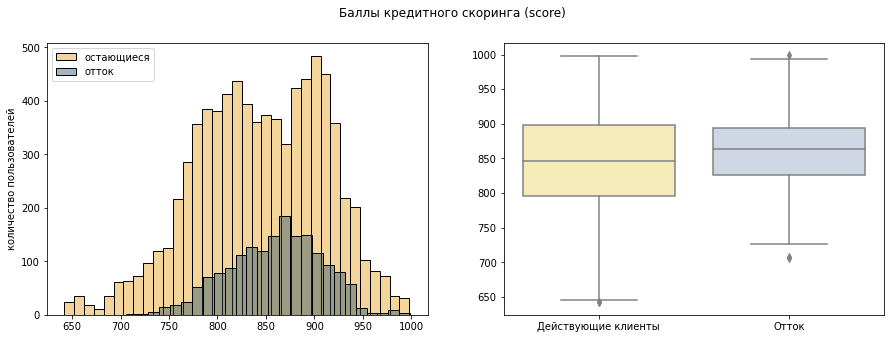

In [43]:
numeric_plots_churn(data, 'score', 'Баллы кредитного скоринга')

Отмечается пик оттока при наличии 850-900 баллов кредитного скоринга.

##### Возраст

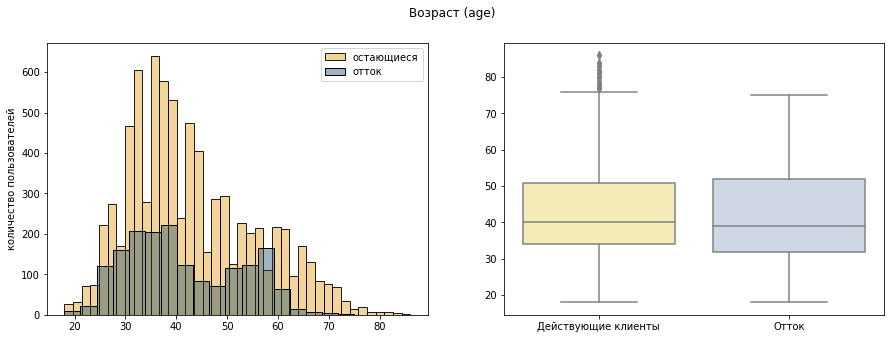

In [44]:
numeric_plots_churn(data, 'age', 'Возраст')

Больше склонны к уходу из банка клиенты старше 50 лет. Наблюдается пиковый возраст для оттока:55-59 лет.

##### Количество баллов собственности

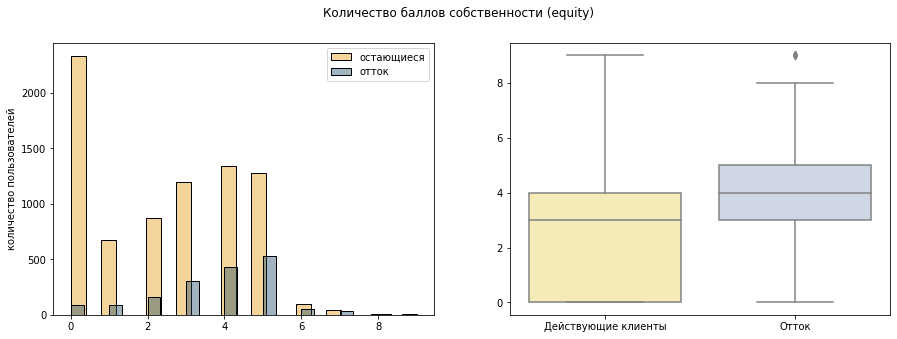

In [45]:
numeric_plots_churn(data, 'equity', 'Количество баллов собственности')

Более склонны к оттоку клиенты, имеющие 3-5 баллов собственности.

##### Баланс на счете

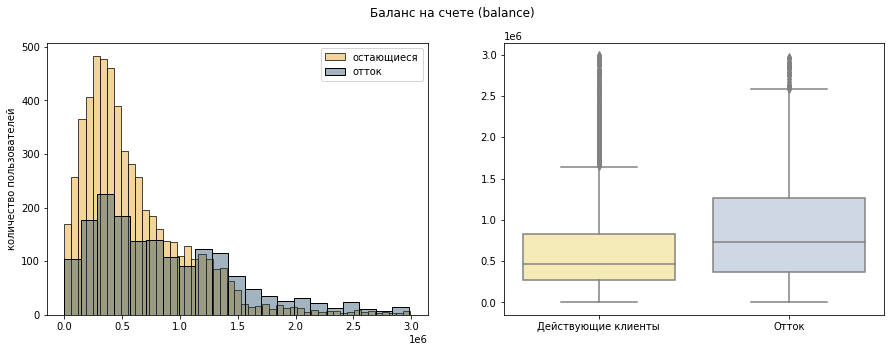

In [46]:
numeric_plots_churn(data,'balance', 'Баланс на счете')

Клиенты с балансом на счету более 1 млн рублей склонны к оттоку.

##### Количество продуктов, которыми пользуется клиент

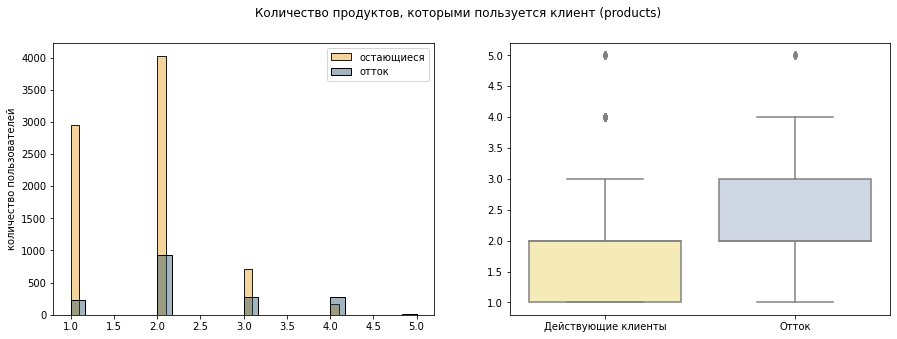

In [47]:
numeric_plots_churn(data,'products', 'Количество продуктов, которыми пользуется клиент')

Клиенты, использующие 1-2 банковских продукта, более стабильны, использующие больше 2 чаще уходят в отток.

##### Оценочный доход клиента

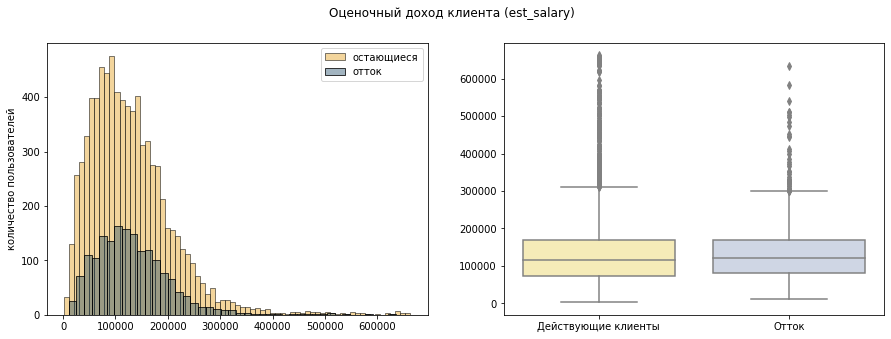

In [48]:
numeric_plots_churn(data,'est_salary', 'Оценочный доход клиента')

Оценочный доход клиента на отток не влияет.

#### Построим гистограммы распределения признаков и диаграммы размаха для категориальных признаков в разрезе оттока.

In [49]:
# функция по построению столбчатых диаграмм и диаграммы размаха для категориальных признаков;
# на входе функции передем параметры: датафрейм, название столбца, по которому строим график, название графика;

def categorical_plots(data, col, title):
    fig, ax = plt.subplots(figsize = (15, 5))

    sns.countplot(x = col, hue = 'churn', data = data, ax = plt.subplot(1, 2, 1),  palette='Pastel2')
    plt.ylabel('количество пользователей')
    plt.xlabel('')
    plt.legend() 
    
    gr = data.groupby([col, 'churn']).agg(count=('age', 'count')).reset_index()
    sns.boxplot(x = col, y = 'count', data = gr, ax = plt.subplot(1, 2, 2), palette='Pastel2_r') 
    plt.xlabel('')
    plt.ylabel('')
    
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()

##### Распределение по полу

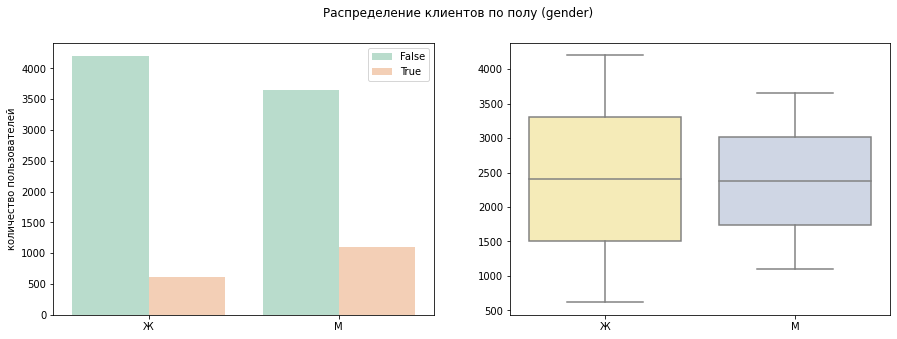

In [50]:
categorical_plots(data, 'gender', 'Распределение клиентов по полу')

Мужчины чаще попадают в категорию отточных клиентов.

##### Распределение по городам

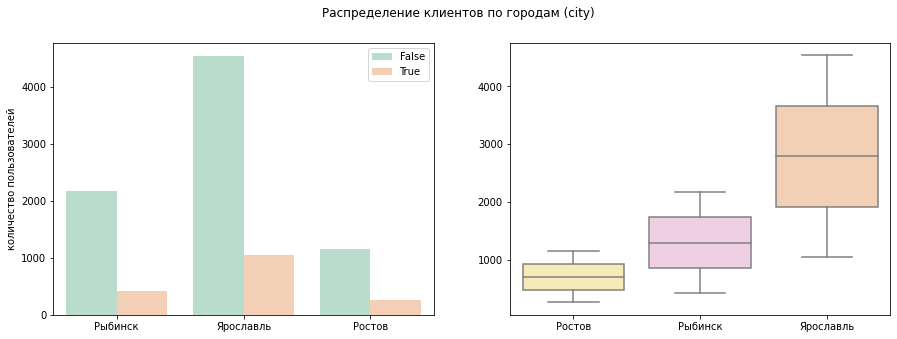

In [51]:
categorical_plots(data, 'city', 'Распределение клиентов по городам')

Существенных отличий по оттоку клиентов между городами не выявлено.

##### Наличие кредитной карты

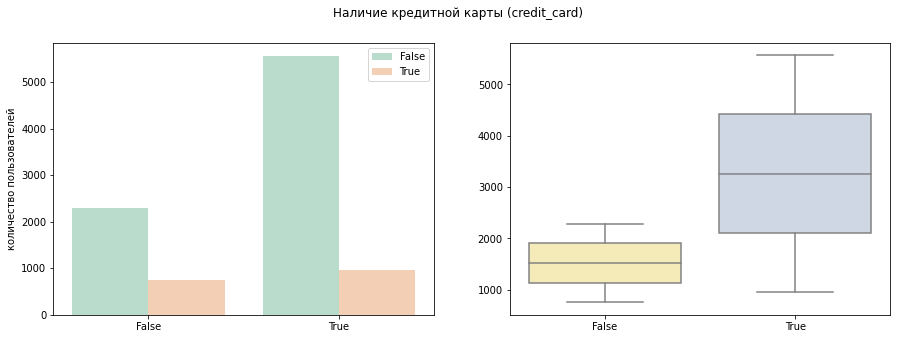

In [52]:
categorical_plots(data, 'credit_card', 'Наличие кредитной карты')

Чаще в отток уходят клиенты, не имеющие кредитной карты.

##### Активность клиента

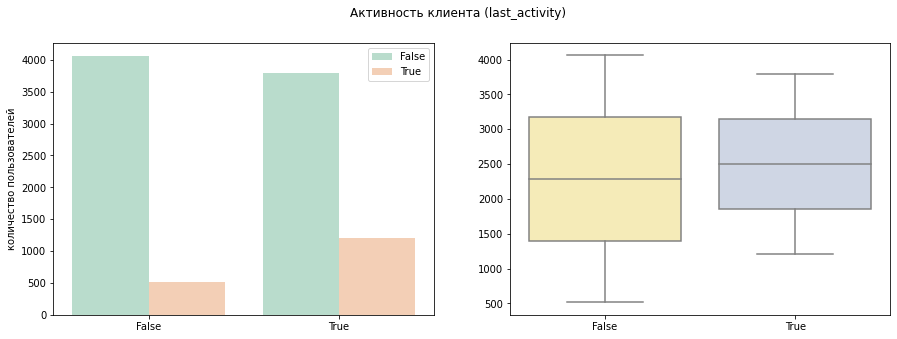

In [53]:
categorical_plots(data, 'last_activity', 'Активность клиента')

Более активные клиенты чаще становятся отточными.

***Выводы***

На отток влияют признаки :

- пол (мужчины попадают в эту категорию чаще);
- возраст (пик - клиенты в диапазоне 55-59 лет);
- кредитный скоринг (отмечается пик оттока при наличии 850-900 баллов);
- количество используемых банковских продуктов (клиенты, использующие более 2 продуктов чаще уходят в отток);
- баланс (клиенты с балансом на счету более 1 млн рублей склонны к оттоку);
- наличие кредитной карты (не имеющие карты клиентычаще становятся отточными);
- активность клиента (более активные клиенты чаще становятся отточными).

### Матрица корреляции

Построим матрицу корреляции признаков.

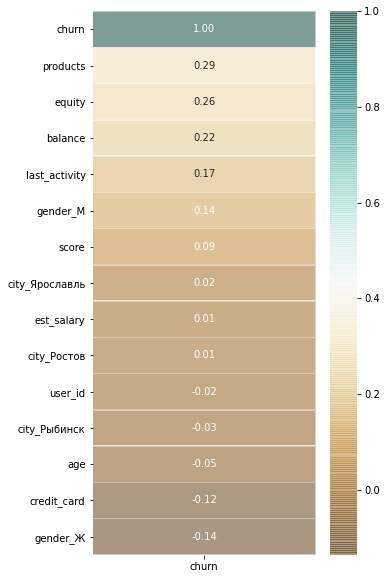

In [54]:
f, ax = plt.subplots(figsize=(5, 10))

churn_corr = data.corr()[['churn']].sort_values(by='churn', ascending=False)


sns.heatmap(churn_corr, annot=True, linewidths=.5, ax=ax, cmap='BrBG',fmt='.2f', alpha=.5)
plt.show()

Выраженной корреляции определенного признака и оттока клиентов не выявлено. Есть зависимость между оттоком и количества используемых продуктов, балансом на счете и количеством баллов собственности.Но зависимость меньше 30%, поэтому утверждать о влиянии этих факторов на отток мы не можем.

### Составим портрет типичного клиента, который склонен к оттоку или нет

#### Склонны к оттоку:


- мужчины
- возраст 50-60 лет
- активные клиенты банка
- не имеющие кредитной карты
- используют 3-4 банковских продукта
- имеют баланс на счете более 1 млн рублей 
- имеют 3-5 баллов собственности
- имеют 850-900 баллов кредитного скоринга

#### Стабильные клиенты:


- женщины
- возраст 30-40 лет
- имеющие кредитную карту
- используют 1-2 банковских продукта
- не являются активными клиентами
- имеют баланс на счете 300-500 тыс. рублей
- не имеет собственности или обладает 1-2 баллами
- имеет 800-850 или 900-930 баллов кредитного скоринга

## Сформулировать и проверить статистические гипотезы:

### Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

***Сформулируем нулевую и альтернативную гипотезы:***

Н0: средний доход клиентов, которые ушли,равен среднему доходу оставшихся клиентов

Н1: средний доход клиентов, которые ушли, отличается от среднего дохода оставшихся клиентов

In [55]:
clients_churn = data[(data['churn']==True)]['est_salary']
clients_non_churn = data[(data['churn']==False)]['est_salary']


Уровень значимости зададим обычный: alpha = 0,05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух независимых выборок.

Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам иcпользуется метод st.stats.ttest_ind.

Если p-value будет меньше выбранного уровня значимости alpha = 0,05, то нулевую гипотезу о равенстве средних отвергнем. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [56]:
results = st.ttest_ind(clients_churn, clients_non_churn)

alpha = 0.05

print(results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.3642388585172657
Не получилось отвергнуть нулевую гипотезу


***Вывод:*** средний доход клиентов, которые ушли,значимо не отличается от среднего дохода оставшихся клиентов.

Проверим себя

In [57]:
clients_churn = data[(data['churn']==True)]['est_salary'].mean()
clients_non_churn = data[(data['churn']==False)]['est_salary'].mean()
clients_churn


131419.39121000582

In [58]:
clients_non_churn

129472.62135362282

### Проверить гипотезу различия кредитного скоринга между теми клиентами, которые ушли и теми, которые остались.

***Сформулируем нулевую и альтернативную гипотезы:***

Н0: средний кредитный скоринг клиентов, которые ушли,равен среднему кредитному скорингу оставшихся клиентов

Н1: средний кредитный скоринг клиентов, которые ушли, отличается от среднего кредитного скоринга оставшихся клиентов

In [59]:
clients_churn = data[(data['churn']==True)]['score']
clients_non_churn = data[(data['churn']==False)]['score']


Уровень значимости зададим обычный: alpha = 0,05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух независимых выборок.

Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам иcпользуется метод st.stats.ttest_ind.

Если p-value будет меньше выбранного уровня значимости alpha = 0,05, то нулевую гипотезу о равенстве средних отвергнем. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [60]:
results = st.ttest_ind(clients_churn, clients_non_churn)

alpha = 0.05

print(results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.4375193065719657e-19
Отвергаем нулевую гипотезу


***Вывод:*** средний кредитный скоринг клиентов, которые ушли, значимо отличается от среднего кредитного скоринга оставшихся клиентов.

Проверим себя

In [61]:
clients_churn = data[(data['churn']==True)]['score'].mean()
clients_non_churn = data[(data['churn']==False)]['score'].mean()
clients_churn

859.5293775450843

In [62]:
clients_non_churn

844.1520438049154

## Промежуточные выводы 

***Признаки, стратегическим образом влияющие на отток клиентов:***

- пол (мужчины попадают в эту категорию чаще);
- возраст более 50 лет;
- кредитный скоринг (отмечается пик оттока при наличии 850-900 баллов);
- количество используемых банковских продуктов (клиенты, использующие более 2 продуктов чаще уходят в отток);
- баланс (клиенты с большим балансом на счету более склонны к оттоку);
- наличие кредитной карты (не имеющие карты клиенты чаще становятся отточными);
- активность клиента (более активные клиенты чаще становятся отточными). 

***Признаки, практически не влияющие на отток клиентов:***

- город проживания;
- оценочный доход клиента.

## Cформируем сегменты на основе стратегических показателей и отберем из них значимые .

In [63]:
data.groupby('gender')['churn'].mean()

gender
Ж    0.127699
М    0.232128
Name: churn, dtype: float64

Среди мужчин отток почти в два раза выше, чем среди женщин.

In [64]:
data.groupby('city')['churn'].mean()

city
Ростов       0.185053
Рыбинск      0.160480
Ярославль    0.187063
Name: churn, dtype: float64

По городам отток только в Рыбинске немного ниже среднего по банку (18%)

In [65]:
data.groupby('products')['churn'].mean()

products
1    0.072126
2    0.187853
3    0.280773
4    0.626424
5    0.421053
Name: churn, dtype: float64

Больше отток среди клиентов, пользующихся 4 и 5 продуктами.

### Сформируем сегменты пользователей и рассчитаем для каждого основные метрики.

#### Рассмотрим мужчин,  активных пользователей банка, но не имеющих кредитной карты.

In [66]:
seg_1 = data.query("gender == 'М' and credit_card == False and last_activity == True ")


In [67]:
# Общее количество пользователей в сегменте
total_users = seg_1.shape[0]

# Количество ушедших клиентов в сегменте
churn_count = seg_1['churn'].sum()

# Процент ушедших клиентов
churn_rate = ((churn_count / total_users) * 100).round(2)

print("Общее число пользователей в сегменте:", total_users)
print("Количество ушедших клиентов:", churn_count)
print("Процент ушедших клиентов:", churn_rate)


Общее число пользователей в сегменте: 665
Количество ушедших клиентов: 274
Процент ушедших клиентов: 41.2


#### Рассмотрим мужчин,  имеющих 3-5 баллов собственности и баланс на счете более 1 млн. рублей.

In [68]:
seg_2 = data.query("gender == 'М' and 3<= equity <=5 and balance > 1000000 ")


In [69]:
total_users = seg_2.shape[0]
churn_count = seg_2['churn'].sum()
churn_rate = ((churn_count / total_users) * 100).round(2)

print("Общее число пользователей в сегменте:", total_users)
print("Количество ушедших клиентов:", churn_count)
print("Процент ушедших клиентов:", churn_rate)


Общее число пользователей в сегменте: 740
Количество ушедших клиентов: 358
Процент ушедших клиентов: 48.38


#### Рассмотрим мужчин,  проживающих в Ярославле и имеющих баланс на счете более 1 млн. рублей.

In [70]:
seg_3 = data.query("gender == 'М' and city == 'Ярославль' and balance > 1000000 ")


In [71]:
total_users = seg_3.shape[0]
churn_count = seg_3['churn'].sum()
churn_rate = ((churn_count / total_users) * 100).round(2)

print("Общее число пользователей в сегменте:", total_users)
print("Количество ушедших клиентов:", churn_count)
print("Процент ушедших клиентов:", churn_rate)

Общее число пользователей в сегменте: 489
Количество ушедших клиентов: 252
Процент ушедших клиентов: 51.53


#### Рассмотрим мужчин,  активных пользователей банка, использующих более 2 продуктов.

In [72]:
seg_4 = data.query("gender == 'М' and last_activity == True and products >2 ")


In [73]:
total_users = seg_4.shape[0]
churn_count = seg_4['churn'].sum()
churn_rate = ((churn_count / total_users) * 100).round(2)

print("Общее число пользователей в сегменте:", total_users)
print("Количество ушедших клиентов:", churn_count)
print("Процент ушедших клиентов:", churn_rate)

Общее число пользователей в сегменте: 381
Количество ушедших клиентов: 204
Процент ушедших клиентов: 53.54


#### Рассмотрим пользователей старше 50 лет,  имеющих баланс больше 1 млн рублей и не имеющих кредитной карты

In [74]:
seg_5 = data.query("age > 50 and credit_card == False and balance > 1000000 ")


In [75]:
total_users = seg_5.shape[0]
churn_count = seg_5['churn'].sum()
churn_rate = ((churn_count / total_users) * 100).round(2)

print("Общее число пользователей в сегменте:", total_users)
print("Количество ушедших клиентов:", churn_count)
print("Процент ушедших клиентов:", churn_rate)

Общее число пользователей в сегменте: 303
Количество ушедших клиентов: 119
Процент ушедших клиентов: 39.27


#### Рассмотрим пользователей старше 50 лет,  имеющих баланс больше 1 млн рублей и кредитный скоринг более 800

In [76]:
seg_6 = data.query("age > 50 and balance > 1000000 and score > 800")


In [77]:
total_users = seg_6.shape[0]
churn_count = seg_6['churn'].sum()
churn_rate = ((churn_count / total_users) * 100).round(2)

print("Общее число пользователей в сегменте:", total_users)
print("Количество ушедших клиентов:", churn_count)
print("Процент ушедших клиентов:", churn_rate)

Общее число пользователей в сегменте: 483
Количество ушедших клиентов: 172
Процент ушедших клиентов: 35.61


#### Рассмотрим женщин,  активных пользователей банка, но не имеющих кредитной карты

In [78]:
seg_7 = data.query("gender == 'Ж' and credit_card == False and last_activity == True ")


In [79]:
total_users = seg_7.shape[0]
churn_count = seg_7['churn'].sum()
churn_rate = ((churn_count / total_users) * 100).round(2)

print("Общее число пользователей в сегменте:", total_users)
print("Количество ушедших клиентов:", churn_count)
print("Процент ушедших клиентов:", churn_rate)

Общее число пользователей в сегменте: 1000
Количество ушедших клиентов: 296
Процент ушедших клиентов: 29.6


#### Рассмотрим женщин,  имеющих 3-5 баллов собственности и баланс на счете более 1 млн. рублей.

In [80]:
seg_8 = data.query("gender == 'Ж' and 3<= equity <=5 and balance > 1000000 ")


In [81]:
total_users = seg_8.shape[0]
churn_count = seg_8['churn'].sum()
churn_rate = ((churn_count / total_users) * 100).round(2)

print("Общее число пользователей в сегменте:", total_users)
print("Количество ушедших клиентов:", churn_count)
print("Процент ушедших клиентов:", churn_rate)

Общее число пользователей в сегменте: 748
Количество ушедших клиентов: 199
Процент ушедших клиентов: 26.6


Процент отточных клиентов во всех сегментах выше среднего по банку (18%).

### Сформируем итоговый датафрейм с метриками для полученных сегментов с целью их приоритизации

In [82]:
# Создадим пустой список для хранения данных по каждому сегменту
segment_data = []

# Для каждого сегмента считаем метрики и добавляем их в список
for segment_name, segment_df in [('seg_1', seg_1), ('seg_2', seg_2), ('seg_3', seg_3), 
                                 ('seg_4', seg_4), ('seg_5', seg_5), ('seg_6', seg_6), 
                                 ('seg_7', seg_7), ('seg_8', seg_8)]:
    
    # Расчет метрик для текущего сегмента
    total_users = segment_df.shape[0]
    churn_count = segment_df['churn'].sum()
    churn_rate = ((churn_count / total_users) * 100).round(2) if total_users > 0 else 0

    # Добавление данных по сегменту в список
    segment_data.append({
        'segment': segment_name,
        'Всего клиентов': total_users,
        'Число отточных клиентов': churn_count,
        'Процент оттока': churn_rate
    })

# Создание общего датафрейма из списка
segment_summary_df = pd.DataFrame(segment_data)

# Просмотр итогового датафрейма, отсортированного по числу отточных клиентов
segment_summary_df.sort_values(by = 'Число отточных клиентов', ascending = False).reset_index(drop=True)


,segment,Всего клиентов,Число отточных клиентов,Процент оттока
0,seg_2,740,358,48.38
1,seg_7,1000,296,29.60
2,seg_1,665,274,41.20
3,seg_3,489,252,51.53
4,seg_4,381,204,53.54
5,seg_8,748,199,26.60
6,seg_6,483,172,35.61
7,seg_5,303,119,39.27


Визуализируем полученные результаты.

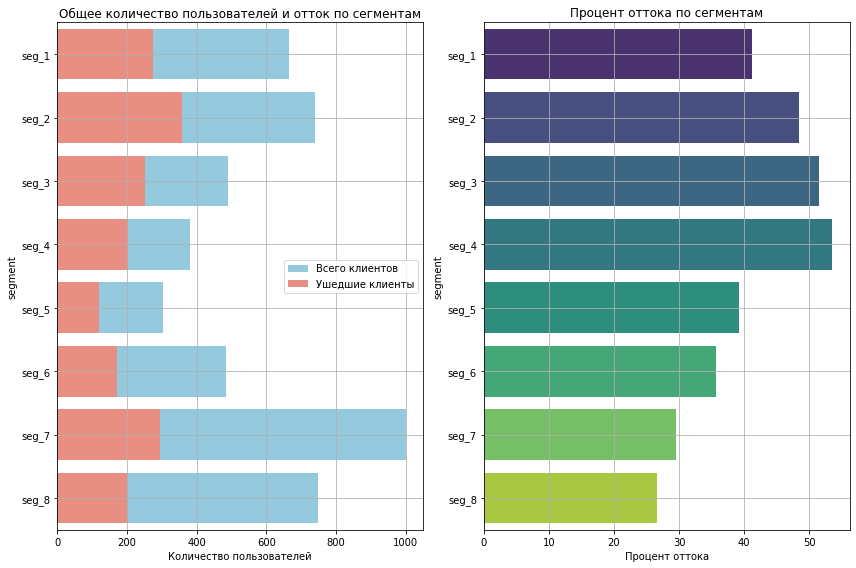

In [83]:
# Устанавливаем размер графиков
plt.figure(figsize=(12, 8))

# Визуализация общего количества пользователей и количества ушедших
plt.subplot(1, 2, 1)
sns.barplot(x='Всего клиентов', y='segment', data=segment_summary_df, color='skyblue', label='Всего клиентов')
sns.barplot(x='Число отточных клиентов', y='segment', data=segment_summary_df, color='salmon', label='Ушедшие клиенты')
plt.xlabel('Количество пользователей')
plt.title('Общее количество пользователей и отток по сегментам')
plt.grid()
plt.legend()

# Визуализация процента ушедших клиентов по сегментам
plt.subplot(1, 2, 2)
sns.barplot(x='Процент оттока', y='segment', data=segment_summary_df, palette='viridis')
plt.xlabel('Процент оттока')
plt.title('Процент оттока по сегментам')
plt.grid()
plt.tight_layout()
plt.show()

**Приоритетными будем считать сегменты:**

- сегмент 2 (мужчины, имеющие 3-5 баллов собственности и баланс на счете более 1 млн. рублей)
- сегмент 1 (мужчины, активные пользователи банка, но не имеющие кредитной карты)
- сегмент 7 (женщины, активные пользователи банка, но не имеющие кредитной карты)


## Выводы и рекомендации для заказчика по конкретным сегментам

1. На основании полученных данных выявлено: 

   - Больше половины всех клиентов банка проживают в Ярославле, 27% в Рыбинске, меньшая часть - в Ростове.Женщин и мужчин среди клиентов банка примерно поровну.Наибольшее число клиентов банка в возрасте 30-40 лет, пиковые значения - 36-37 лет.
   - Кредитная карта есть у 68% пользователей.Активными считаются 52% клиентов банка.
   - Пиковые значения оценочного дохода клиентов находятся в районе 100 тыс.рублей.
   - Большая часть клиентов не имеет объектов в собственности, либо имеет 3-5.
   - Большая часть клиентов пользуется 1 или 2 продуктами банка.
   - **Отток клиентов из банка составляет 18%**.
   
   
2. Составлен портрет типичного клиента, который склонен к оттоку:
   - мужчина
   - возраст 50-60 лет
   - активный клиент банка
   - не имеющий кредитной карты
   - использует 3-4 банковских продукта
   - имеет баланс на счете более 1 млн рублей
   - имеет 3-5 баллов собственности
   - имеет 850-900 баллов кредитного скоринга
   
   
3. Выявлены признаки, стратегическим образом влияющие на отток клиентов:

   - пол (мужчины попадают в эту категорию чаще);
   - возраст (пик - клиенты в диапазоне 55-59 лет);
   - кредитный скоринг (отмечается пик оттока при наличии 850-900 баллов);
   - количество используемых банковских продуктов (клиенты, использующие более 2 продуктов чаще уходят в отток);
   - баланс (клиенты с большим балансом на счету более склонны к оттоку);
   - наличие кредитной карты (не имеющие карты клиенты чаще становятся отточными);
   - активность клиента (более активные клиенты чаще становятся отточными). 
   
   
4. Сформулированы и проверены статистические гипотезы,получены результаты:

   - средний доход клиентов, которые ушли,значимо не отличается от среднего дохода оставшихся клиентов;
   - средний кредитный скоринг клиентов, которые ушли, значимо отличается от среднего кредитного скоринга оставшихся клиентов.
   
   
5. На основе стратегических показателей сформированы сегменты пользователей, из них отобраны приоритетные .


6. ***Рекомендации по сегментам:***

   - ***Сегмент 2*** (мужчины, имеющие 3-5 баллов собственности и баланс на счете более 1 млн. рублей):
      - для удержания клиентов этого сегмента можно предложить выгодные условия страхования собственности
      - выгодные условия для депозита более 1 млн рублей
      - акции и кэшбек в спортивных, автомобильных магазинах,  в период "мужских" праздников
      
   - ***Сегмент 1*** (мужчины, активные пользователи банка, но не имеющие кредитной карты):
      - выгодные условия пользования кредитной картой (пользователи, обладающие этой картой, реже уходят в отток)
      - акции и кэшбек в спортивных, автомобильных магазинах в период "мужских" праздников
      
   - ***Сегмент 7*** (женщины, активные пользователи банка, но не имеющие кредитной карты):
      - выгодные условия пользования кредитной картой
      - акции и кэшбек в магазинах белья, косметики и парфюмерии
      - процент оттока в этом сегменте уступает другим, но количество пользователей в нем свидетельствует о перспективности сегмента.
     

